In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
import copy


In [311]:
df = pd.read_csv("../Zhuravlev/data/raw/anime.csv")


C:\Users\EBLAN\AppData\Local\Temp\ipykernel_8196\1120586955.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfHeatmap = dfHeatmap[df.type != "Unknown"]
C:\Users\EBLAN\AppData\Local\Temp\ipykernel_8196\1120586955.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfHeatmap = dfHeatmap[df.episodes != "Unknown"]
C:\Users\EBLAN\AppData\Local\Temp\ipykernel_8196\1120586955.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHeatmap['type']= le.transform(dfHeatmap.type)
C:\Users\EBLAN\AppData\Local\Temp\ipykernel_8196\1120586955.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

<AxesSubplot: >

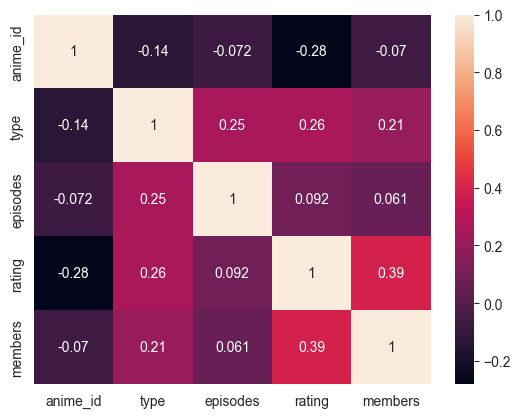

In [312]:
dfHeatmap = copy.deepcopy(df)
dfHeatmap.dropna(inplace=True)
dfHeatmap.info
dfHeatmap = dfHeatmap[df.type != "Unknown"]
dfHeatmap = dfHeatmap[df.episodes != "Unknown"]
le = LabelEncoder()
le.fit(dfHeatmap['type'])
dfHeatmap['type']= le.transform(dfHeatmap.type)
dfHeatmap.episodes=dfHeatmap['episodes'].astype(str).astype(int)
corr3 = dfHeatmap.corr()
sns.heatmap(corr3, annot=True)

In [313]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11433 entries, 0 to 11432
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11433 non-null  int64  
 1   name      11433 non-null  object 
 2   genre     11375 non-null  object 
 3   type      11411 non-null  object 
 4   episodes  11433 non-null  object 
 5   rating    11223 non-null  float64
 6   members   11433 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 625.4+ KB


In [315]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
anime_id,11433.0,NaN,NaN,NaN,14007.331846,11431.094461,1.0,3497.0,10199.0,24677.0,34522.0
name,11433,11432,Shi Wan Ge Leng Xiaohua,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,11375,3126,Hentai,763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,11411,6,TV,3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,11433,181,1,5280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,11223.0,NaN,NaN,NaN,6.476108,1.021547,1.67,5.885,6.57,7.18,10.0
members,11433.0,NaN,NaN,NaN,17914.905012,53536.353813,11.0,229.0,1553.0,9460.0,896229.0


In [316]:
df.isnull().sum()

anime_id      0
name          0
genre        58
type         22
episodes      0
rating      210
members       0
dtype: int64

In [317]:
df.dropna(inplace=True)
df.info

<bound method DataFrame.info of        anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
11428      9316       Toushindai My Lover: Minami tai Mecha-Minami   
11429      5543                                        Under World   
11430      5621                     Violence Gekiga David no Hoshi   
11431      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
11432     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Superna

In [318]:
df = df[df.type != "Unknown"]
df = df[df.episodes != "Unknown"]


In [319]:
# genres = ''
#
# for i in df.genre:
#    tokens = i.split(", ")
#    print(tokens)
#    for token in tokens:
#        if token not in genres:
#            genres.append(token)
# genres.sort()
# print(len(genres), "genres:")
# print(genres)

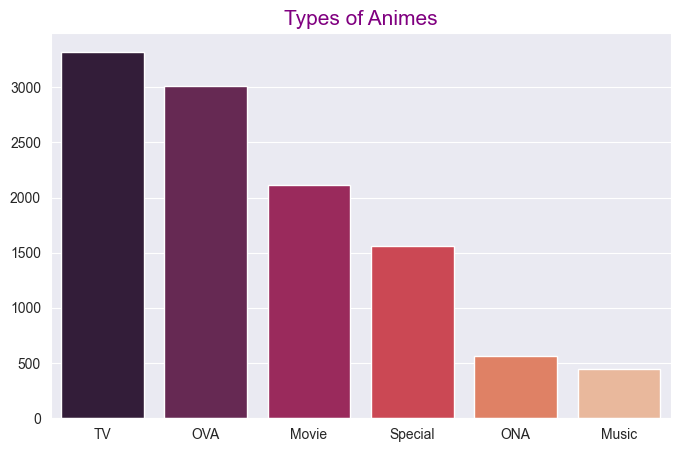

In [320]:
animetypes = df['type'].value_counts(dropna=False)

plt.figure(figsize=(8,5))
sns.barplot(x=animetypes.index,y=animetypes.values, palette="rocket")
plt.title('Types of Animes',color = 'purple',fontsize=15)
plt.show()

In [321]:
typeString = ''
for i in df.type:
    typeString += i.replace(' ','')+','

types=list(set(typeString.split(',')))[1:]
print(f' there are {len(types)} unique types, here is complete list: \n {types}')
for type in types:
    encoding = [type in i for i in df.type]
    df["type_"+type] = encoding



 there are 6 unique types, here is complete list: 
 ['OVA', 'Special', 'TV', 'Music', 'ONA', 'Movie']


In [322]:
#df.drop(['type'], axis=1, inplace=True)
#df.head()

In [323]:
genrestring = ''
for i in df.genre:
    genrestring += i.replace(' ','')+','

genres=list(set(genrestring.split(',')))[1:]
print(f' there are {len(genres)} unique genres, here is complete list: \n {genres}')
for genre in genres:
    encoding = [genre in i for i in df.genre]
    df["genre_"+genre] = encoding

#df.drop(['genre'], axis=1, inplace=True)
df.head()

 there are 43 unique genres, here is complete list: 
 ['', 'Magic', 'Game', 'Mystery', 'Kids', 'Horror', 'Demons', 'Adventure', 'Josei', 'Sports', 'Space', 'ShoujoAi', 'Comedy', 'Police', 'Romance', 'Vampire', 'School', 'Supernatural', 'Harem', 'Shounen', 'Shoujo', 'Hentai', 'Historical', 'Ecchi', 'SliceofLife', 'Yaoi', 'Cars', 'Sci-Fi', 'Action', 'Dementia', 'Seinen', 'Psychological', 'Military', 'Fantasy', 'Parody', 'Thriller', 'Music', 'Yuri', 'SuperPower', 'Drama', 'Mecha', 'MartialArts', 'Samurai']


,anime_id,name,genre,type,episodes,rating,members,type_OVA,type_Special,type_TV,...,genre_Fantasy,genre_Parody,genre_Thriller,genre_Music,genre_Yuri,genre_SuperPower,genre_Drama,genre_Mecha,genre_MartialArts,genre_Samurai
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,False,False,True,...,True,False,False,False,False,False,True,False,False,False
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,False,False,True,...,False,True,False,False,False,False,False,False,False,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,False,False,True,...,False,True,False,False,False,False,False,False,False,True


In [324]:
Number =[]
AvgRating = []
TotalMembers = []
for t in genres:
    Number.append(df.loc[df.genre.str.contains(t)==True]['name'].count())
    AvgRating.append(df.loc[df.genre.str.contains(t)==True]['rating'].mean())
    TotalMembers.append(df.loc[df.genre.str.contains(t)==True]['members'].sum())

ComparisonGenre = pd.DataFrame({'Number':Number,'AverageRating':AvgRating,'TotalMembers':TotalMembers}, index=genres)
ComparisonGenre.dropna(inplace=True)
ComparisonGenre.sort_values('Number',ascending=False)
ComparisonGenre = ComparisonGenre.iloc[1:]
ComparisonGenre.head(10)



,Number,AverageRating,TotalMembers
Magic,683,6.802460,19219451
Game,154,6.786558,5756068
Mystery,443,7.237856,23784003
Kids,1455,6.129869,2647904
Horror,334,6.429072,11981267
Demons,269,6.674238,8864710
Adventure,2136,6.739714,41382974
Josei,49,7.420816,2112911
Sports,485,6.788309,6750432
Space,351,6.658348,4751401


In [325]:
ComparisonGenre = ComparisonGenre.loc[(ComparisonGenre.Number>ComparisonGenre.Number.quantile(0.1))&(ComparisonGenre.TotalMembers>ComparisonGenre.TotalMembers.quantile(0.1))]
ComparisonGenre.all

<bound method NDFrame._add_numeric_operations.<locals>.all of                Number  AverageRating  TotalMembers
Magic             683       6.802460      19219451
Game              154       6.786558       5756068
Mystery           443       7.237856      23784003
Kids             1455       6.129869       2647904
Horror            334       6.429072      11981267
Demons            269       6.674238       8864710
Adventure        2136       6.739714      41382974
Sports            485       6.788309       6750432
Space             351       6.658348       4751401
Comedy           4200       6.642024      98056673
Police            182       7.110165       3608908
Romance          1323       6.999909      60703867
Vampire            96       6.882188       6090425
School           1093       6.979963      50745476
Supernatural      913       7.014545      51104301
Harem             294       6.959082      18776611
Shounen          1613       7.055852      50964670
Shoujo            57

In [326]:
ComparisonGenre.describe

<bound method NDFrame.describe of                Number  AverageRating  TotalMembers
Magic             683       6.802460      19219451
Game              154       6.786558       5756068
Mystery           443       7.237856      23784003
Kids             1455       6.129869       2647904
Horror            334       6.429072      11981267
Demons            269       6.674238       8864710
Adventure        2136       6.739714      41382974
Sports            485       6.788309       6750432
Space             351       6.658348       4751401
Comedy           4200       6.642024      98056673
Police            182       7.110165       3608908
Romance          1323       6.999909      60703867
Vampire            96       6.882188       6090425
School           1093       6.979963      50745476
Supernatural      913       7.014545      51104301
Harem             294       6.959082      18776611
Shounen          1613       7.055852      50964670
Shoujo            574       6.895784      139282

In [327]:
x1 = ComparisonGenre.Number
x2 = ComparisonGenre.AverageRating
x3 = ComparisonGenre.TotalMembers
y = ComparisonGenre.index

C:\Users\EBLAN\AppData\Local\Temp\ipykernel_8196\1918732284.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(y, rotation=90)
C:\Users\EBLAN\AppData\Local\Temp\ipykernel_8196\1918732284.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(y, rotation=90)


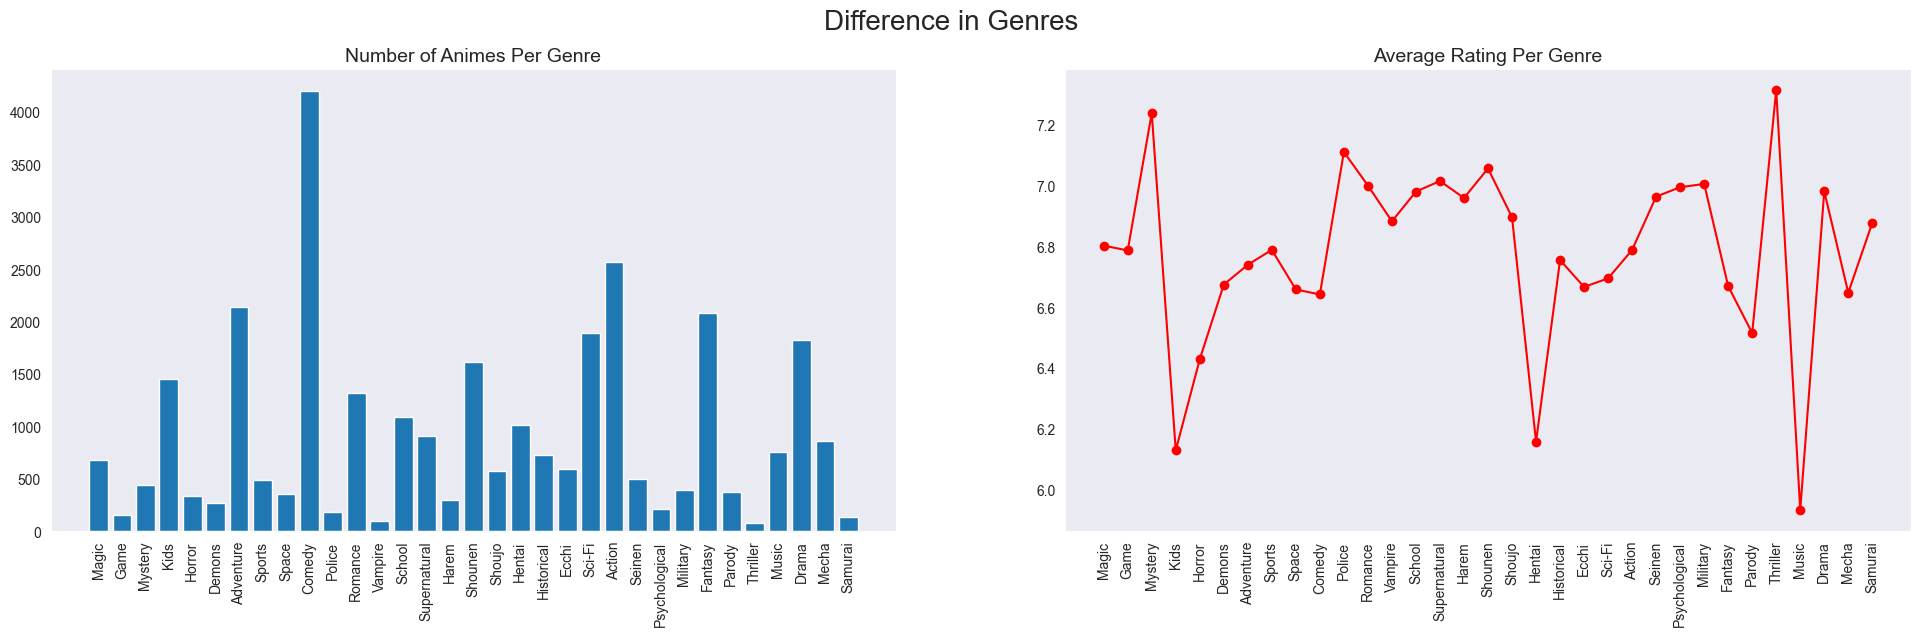

In [328]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(24,6))
plt.suptitle('Difference in Genres',size=20)
ax1.set_xticklabels(y, rotation=90)
ax1.set_title('Number of Animes Per Genre',size = 14)
ax1.bar(y[:],x1[:])
ax1.grid()
ax2.set_title('Average Rating Per Genre',size = 14)
ax2.set_xticklabels(y, rotation=90)
ax2.plot(y,x2,color='r',marker='o')
ax2.grid()

In [329]:
import seaborn as sb

C:\Users\EBLAN\AppData\Local\Temp\ipykernel_8196\4292574918.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x2, y=x3, cmap="Reds", shade=True, bw_method=.15)


<AxesSubplot: title={'center': 'The Visualization of Accumulation'}, xlabel='AverageRating', ylabel='TotalMembers'>

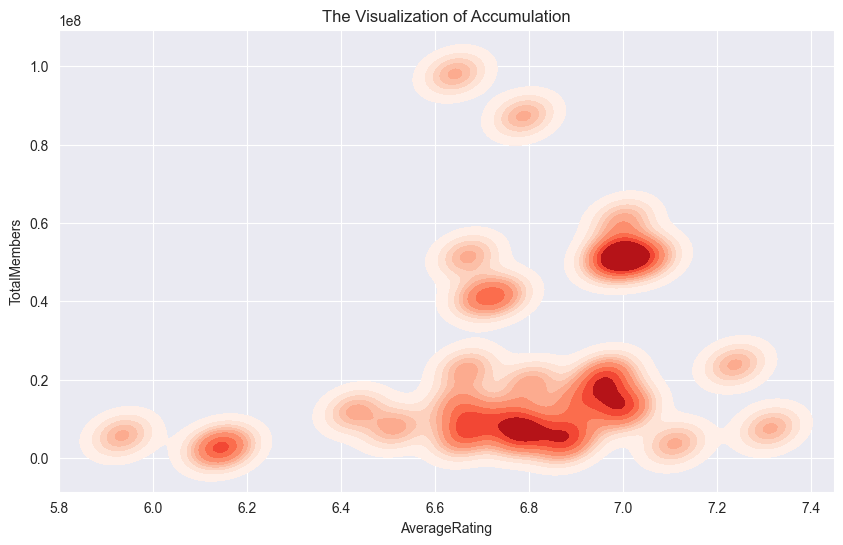

In [330]:
plt.figure(figsize=(10,6))
plt.title('The Visualization of Accumulation')
sns.kdeplot(x=x2, y=x3, cmap="Reds", shade=True, bw_method=.15)

In [334]:
typelist = list(df.type.unique())
Numbert = []
Avgratingt = []
Totalmemberst = []

for t in typelist:
    Numbert.append(df.loc[df.type.str.contains(t)==True]['name'].count())
    Avgratingt.append(df.loc[df.type.str.contains(t)==True]['rating'].mean())
    Totalmemberst.append(df.loc[df.type.str.contains(t)==True]['members'].sum())

Comparison_type = pd.DataFrame({'Number': Numbert,'Average_Rating':Avgratingt,'Total_members':Totalmemberst},index=typelist)
Comparison_type.dropna(inplace=True)
Comparison_type=Comparison_type.sort_values('Number',ascending=False)
Comparison_type

,Number,Average_Rating,Total_members
TV,3322,6.922709,145827554
OVA,3006,6.377994,18621344
Movie,2110,6.333739,22362696
Special,1562,6.530378,11986870
ONA,560,5.652750,2481868
Music,446,5.587937,566043
